In [4]:
import torch

In [7]:
pip install torch-geometric

   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.1 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.1 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.1 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.1 MB ? eta -:--:--
   ------------------ --------------------- 0.5/1.1 MB 390.1 kB/s eta 0:00:02
   ------------------ --------------------- 0.5/1.1 MB 390.1 kB/s eta 0:00:02
   --------------------------- ------------ 0.8/1.1 MB 472.8 kB/s eta 0:00:01
   --------------------------- ------------ 0.8/1.1 MB 472.8 kB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 537.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated pa


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Dell\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [8]:
from torch_geometric.data import Data

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [205]:
data=torch.load('graph_data_percentage2.pt')

C:\Users\Dell\AppData\Local\Temp\ipykernel_5528\3968315524.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data=torch.load('graph_data_percentage2.pt')


In [206]:
data.y[data.y == -1] = 3

In [207]:
num_nodes = data.num_nodes
num_train = int(0.8 * num_nodes)
train_mask = torch.zeros(num_nodes, dtype=torch.bool)
train_mask[:num_train] = 1

In [208]:
data.train_mask = train_mask
data.test_mask = ~train_mask

In [167]:
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from torch.nn.functional import dropout
from torch_geometric.nn import GCNConv, Linear, SAGEConv

In [168]:
import torch
from torch_geometric.nn import GCNConv
from torch.nn import Linear, Dropout, LeakyReLU


In [209]:
class GCN(torch.nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = GCNConv(-1, 64)
        self.conv2 = GCNConv(64, 128)
        self.linear1 = Linear(128, 64)
        self.linear2 = Linear(64, num_classes)
        self.dropout = Dropout(p=0.4)
        #self.activation = LeakyReLU(negative_slope=0.01)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
       # x = self.activation(x)
        x = self.dropout(x)
        x = self.conv2(x, edge_index)
        #x = self.activation(x)
        x = self.dropout(x)
        x = self.linear1(x)
        #x = self.activation(x)
        x = self.linear2(x)
        return x

In [210]:
def train(model, dataset, optimizer, criterion, epochs=5):
    if len(dataset.train_mask.shape) > 1:
        train_mask = dataset.train_mask[:, 0]
    else:
        train_mask = dataset.train_mask

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        out = model(dataset.x, dataset.edge_index)
        loss = criterion(out[train_mask],
                         dataset.y[train_mask])
        loss.backward()
        optimizer.step()

        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

In [211]:
data

Data(x=[4150, 1], edge_index=[2, 2270905], y=[4150], train_mask=[4150], test_mask=[4150])

In [212]:
model_gcn = GCN(11)

In [213]:
optimizer = Adam(model_gcn.parameters(), lr=0.001)

In [214]:
criterion = CrossEntropyLoss()

In [215]:
train(model=model_gcn, dataset=data,
      criterion=criterion, optimizer=optimizer,
      epochs=50)

Epoch: 000, Loss: 2.3471
Epoch: 001, Loss: 2.2734
Epoch: 002, Loss: 2.2029
Epoch: 003, Loss: 2.1276
Epoch: 004, Loss: 2.0537
Epoch: 005, Loss: 1.9812
Epoch: 006, Loss: 1.9104
Epoch: 007, Loss: 1.8343
Epoch: 008, Loss: 1.7635
Epoch: 009, Loss: 1.7014
Epoch: 010, Loss: 1.6363
Epoch: 011, Loss: 1.5778
Epoch: 012, Loss: 1.5282
Epoch: 013, Loss: 1.4912
Epoch: 014, Loss: 1.4703
Epoch: 015, Loss: 1.4434
Epoch: 016, Loss: 1.4301
Epoch: 017, Loss: 1.4278
Epoch: 018, Loss: 1.4252
Epoch: 019, Loss: 1.4246
Epoch: 020, Loss: 1.4146
Epoch: 021, Loss: 1.4218
Epoch: 022, Loss: 1.4128
Epoch: 023, Loss: 1.4035
Epoch: 024, Loss: 1.3944
Epoch: 025, Loss: 1.3832
Epoch: 026, Loss: 1.3765
Epoch: 027, Loss: 1.3636
Epoch: 028, Loss: 1.3645
Epoch: 029, Loss: 1.3626
Epoch: 030, Loss: 1.3673
Epoch: 031, Loss: 1.3530
Epoch: 032, Loss: 1.3584
Epoch: 033, Loss: 1.3549
Epoch: 034, Loss: 1.3508
Epoch: 035, Loss: 1.3420
Epoch: 036, Loss: 1.3352
Epoch: 037, Loss: 1.3348
Epoch: 038, Loss: 1.3246
Epoch: 039, Loss: 1.3256


In [216]:
gcn_embeddings = model_gcn(data.x, data.edge_index).detach().cpu().numpy()

In [217]:
labels = data.y.detach().cpu().numpy()

In [178]:
from sklearn.cluster import KMeans

In [179]:
kmeans_model = KMeans(n_clusters=2)

In [180]:
kmeans_model.fit(gcn_embeddings)

KMeans(n_clusters=2)

In [197]:
from sklearn.cluster import AgglomerativeClustering

In [219]:
hierrarhical_cluster=AgglomerativeClustering(n_clusters=11, linkage='ward')

In [220]:
hierrarhical_cluster.fit(gcn_embeddings)

AgglomerativeClustering(n_clusters=11)

In [221]:
predicted_clusters = hierrarhical_cluster.labels_

In [28]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [43]:
pip install matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 441.3 kB/s eta 0:00:17
   -- ------------------------------------- 0.5/7.8 MB 441.3 kB/s eta 0:00:17
   -- ------------------------------------- 0.5/7.8 MB 441.3 kB/s eta 0:00:17
   ---- ----------------------------------- 0.8/7.8 MB 493.2 kB/s eta 0:00:15
   ---- ----------------------------------- 0.8/7.8 MB 493.2 kB/s eta 0:00:15
   ----- ---------------------------------- 1.0/7.8 MB 535.4 kB/s eta 0:00:13
   ----- ---------------------------------- 1.0/7


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Dell\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [190]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [222]:
model_tsne = TSNE(n_components=2)

In [223]:
gcn_embeddings_2d = model_tsne.fit_transform(gcn_embeddings)

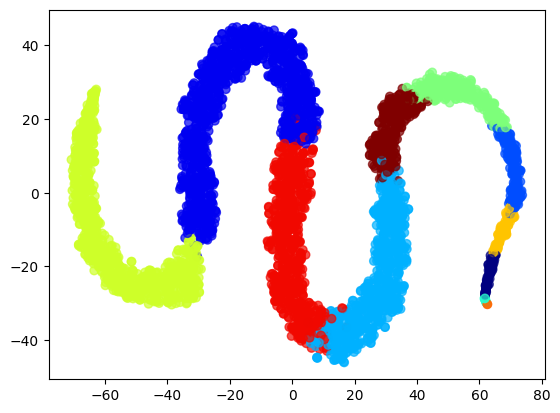

In [224]:
plt.scatter(gcn_embeddings_2d[:, 0], gcn_embeddings_2d[:, 1],
            c=predicted_clusters, cmap='jet', alpha=0.7)

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [225]:
accuracy = accuracy_score(labels, predicted_clusters)
precision = precision_score(labels, predicted_clusters, average='weighted')
recall = recall_score(labels, predicted_clusters, average='weighted')
f1 = f1_score(labels, predicted_clusters, average='weighted')

In [226]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

Accuracy: 0.06216867469879518
Precision: 0.60691709447667
Recall: 0.06216867469879518
F1 score: 0.053312701227172216
